# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 16th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image "face.png" and visualize the RGB image as well as each of its channels separately (R, G, and B).

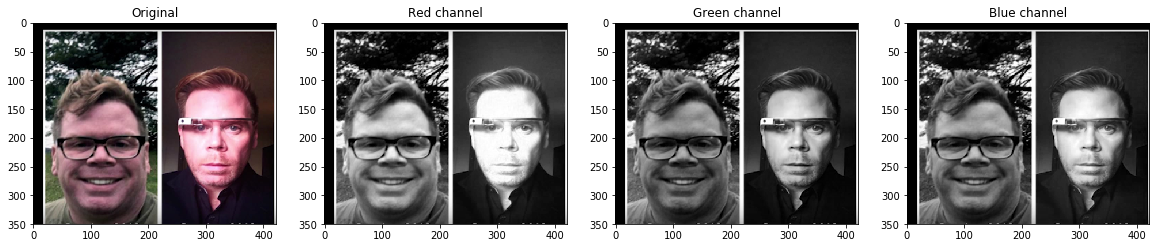

In [9]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

# Set matplotlib to display images inline
%matplotlib inline

from skimage import io

# Load image
face = io.imread("images/face.png")

# Display images
f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(20,5))

# Original
axarr[0].imshow(face)
axarr[0].set_title('Original')

# R channel
axarr[1].imshow(face[:,:,0], cmap = "gray")
axarr[1].set_title('Red channel')

# G channel
axarr[2].imshow(face[:,:,1], cmap = "gray")
axarr[2].set_title('Green channel')

# B channel
axarr[3].imshow(face[:,:,2], cmap = "gray")
axarr[3].set_title('Blue channel')

plt.show()

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

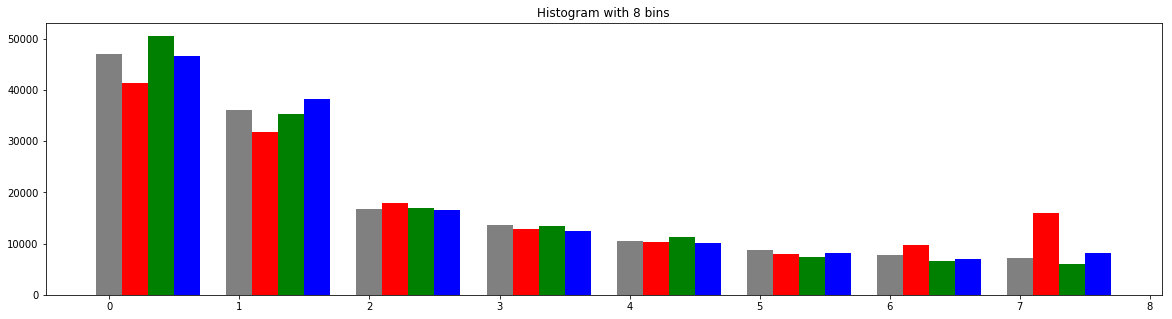

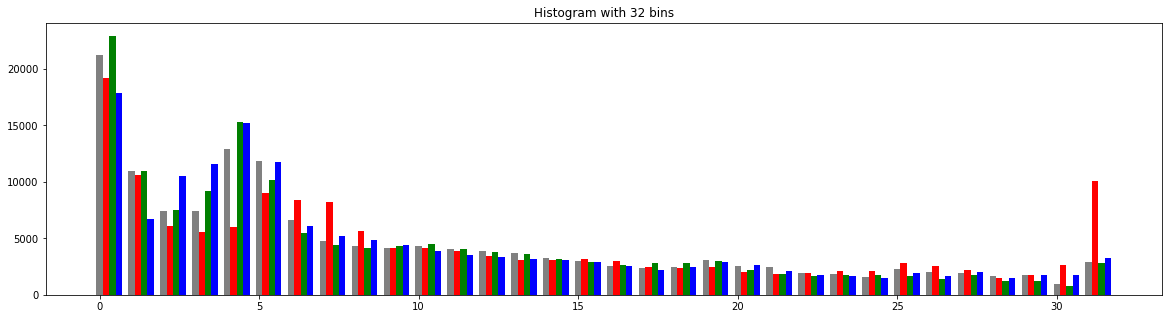

In [10]:
import skimage
from skimage import color

def show_histogram(img, nbins, title = None):
    """
    Display histogram graph for the gray, R, G, B channels of the specified image in (nbins) intervals.
    img:      Image to display histogram of.
    nbins:    Intervals of the histogram.
    """
    
    # Change image values to float in order to define custom nbins
    img = img.astype(float)
    
    # Generate a histogram of our image. We use the ravel() function to transform the original array into a vector
    histogram = skimage.exposure.histogram(img, nbins = nbins)

    # Generate bar graph
    fig = plt.figure(figsize = (20, 5))
    ax = fig.add_subplot(111)

    # Specify bar width and range of X values
    # histogram[1] contains the values of the bins - therefore our X axis is in the range (0, len(histogram[1]))
    num_bars = img.shape[2] if len(img.shape) == 3 else 1
    width = 1 / (num_bars + 1)
    x_range = np.arange(len(histogram[1]))
    
    # Retrieve histogram values for the gray channel in nbins intervals
    # histogram[0] contains the Y value for each bin.
    values = skimage.exposure.histogram(color.rgb2gray(img), nbins = nbins)[0]
    
    # Create bar graph
    rects = ax.bar(x_range, values, width, color='gray')
    
    if len(img.shape) == 3:
        
        # In case image has color channels, retrieve histogram data for 
        # each and add to displayed graph.
        
        r_values = skimage.exposure.histogram(img[:,:,0], nbins = nbins)[0]
        g_values = skimage.exposure.histogram(img[:,:,1], nbins = nbins)[0]
        b_values = skimage.exposure.histogram(img[:,:,2], nbins = nbins)[0]
        
        r_rects = ax.bar(x_range + width * 1, r_values, width, color='r')
        g_rects = ax.bar(x_range + width * 2, g_values, width, color='g')
        b_rects = ax.bar(x_range + width * 3, b_values, width, color='b')
    
    # 'title' parameter is optional. In case it has been defined, display above graph
    if title is not None: 
        ax.set_title(title)
        
    plt.show()

# Display histogram in 8 intervals
show_histogram(face, 8, "Histogram with 8 bins")

# Display histogram in 32 intervals
show_histogram(face, 32, "Histogram with 32 bins")

** Questions **

The histogram of an image represents the density of each given color in a range for the given image.

The images must be a matrix of float values in order to define a custom amount of bins to sample.

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the original image (1) with a transposed version of the mask in (2).
4. Convolve the original image (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

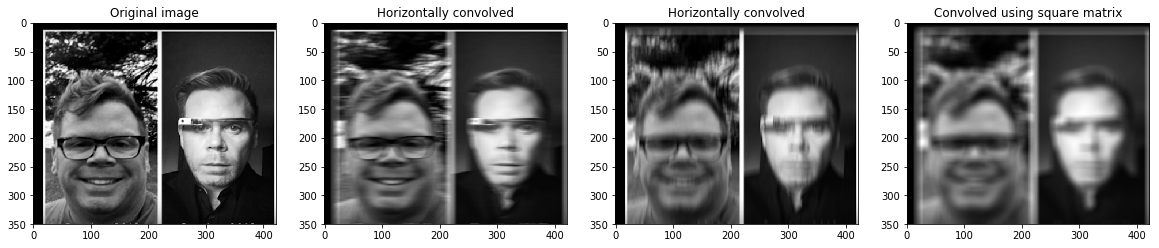

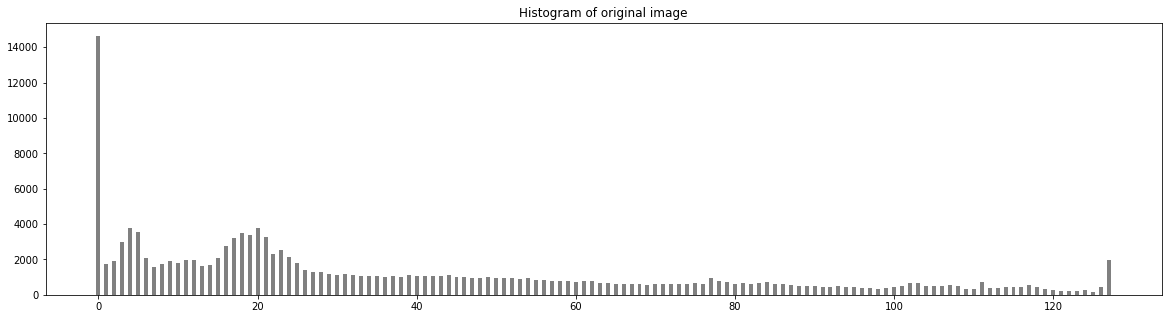

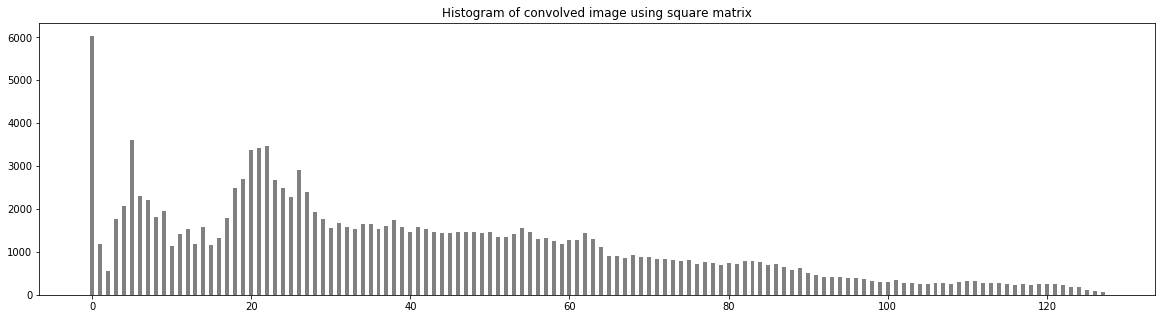

In [11]:
from scipy import ndimage

# Convert face to grayscale
face_gray = color.rgb2gray(face)

# Define output images
convolved_horizontal = face_gray.copy()
convolved_vertical = face_gray.copy()
convolved_square = face_gray.copy()

# Define horizontal convolution mask
mask_h1d = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]], dtype="float")
mask_h1d = mask_h1d / np.sum(mask_h1d)

# Define square convolution mask
mask_square = np.ones((15, 15))

# Convolve image using our defined convolution mask
ndimage.convolve(face_gray, mask_h1d, output = convolved_horizontal)

# Convolve image using transposed convolution mask
ndimage.convolve(face_gray, mask_h1d.T, output = convolved_vertical)

# Convolve image using 15x15 matrix
ndimage.convolve(face_gray, mask_square, output = convolved_square)

# Display images
f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(20,5))

# Original
axarr[0].imshow(face_gray, cmap = "gray")
axarr[0].set_title('Original image')

# Horizontally convolved
axarr[1].imshow(convolved_horizontal, cmap = "gray")
axarr[1].set_title('Horizontally convolved')

# R channel
axarr[2].imshow(convolved_vertical, cmap = "gray")
axarr[2].set_title('Horizontally convolved')

# G channel
axarr[3].imshow(convolved_square, cmap = "gray")
axarr[3].set_title('Convolved using square matrix')

plt.show()

show_histogram(face_gray, 128, "Histogram of original image")
show_histogram(convolved_square, 128, "Histogram of convolved image using square matrix")

**Questions**

1) Observing the histogram, we can notice how, after applying the convolution to our image, the amount of extreme values has decreased in favor of more centered values. This is due to the convolution operation effectively applying the average value of neighboring pixels to each pixel in the image. It is remarkable how the highest value in the histogram for the blurred image is no longer above 14.000, but around 6.000.

2) Depending on the mask we use, each convolution will provide a different result. As we can see above, applying an uni-dimensional horizontal mask blurs the image horizontally, preserving vertical edges. Applying the transposed mask provides the opposite effect: blurring the image vertically while preserving horizontal edges. In the case of the 15x15 square matrix, the whole image is blurred.

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)


im_2=img_as_float(im_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


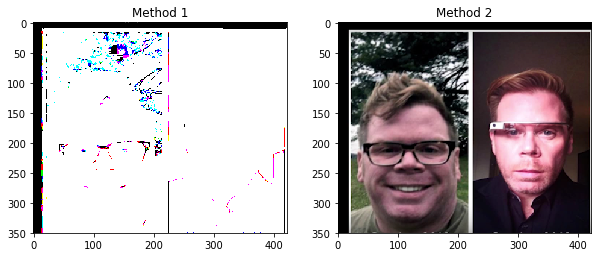

In [12]:
# 1.
im_1 = np.array(face, dtype="float")

# 2.
im_2 = np.array(face)
im_2 = skimage.img_as_float(im_2)

# Display images
f, axarr = plt.subplots(ncols=2, nrows=1,figsize=(10,5))

axarr[0].imshow(im_1, cmap = "gray")
axarr[0].set_title('Method 1')

axarr[1].imshow(im_2, cmap = "gray")
axarr[1].set_title('Method 2')

plt.show()

Our image is originally stored as a multi-channel matrix with integer values in the range [0, 255]. As we can see above, **method 1** simply converts these values from integer to float. **Method 2**, on the other hand, normalizes the image in order to fit all values in the [0, 1] range.
Therefore, using method 1 we get an image full of out-of-range values, resulting in an entirely white picture. Method 2 correctly displays the image.

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Which is the result obtained when applying a single-channel filter channel by channel separately?

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


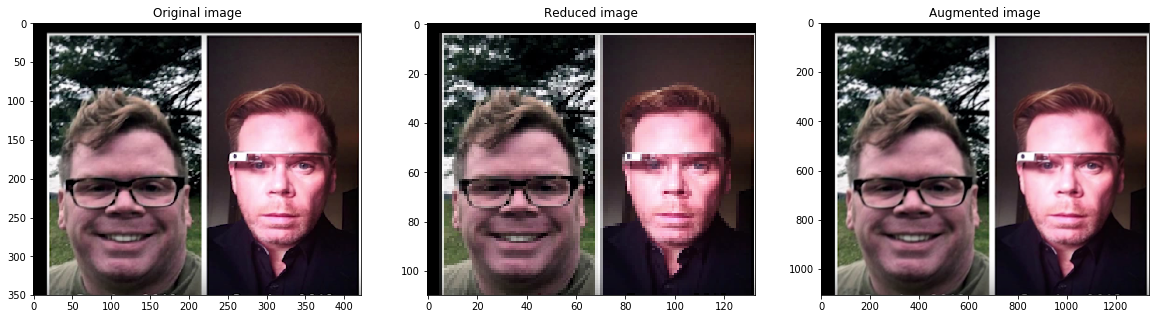

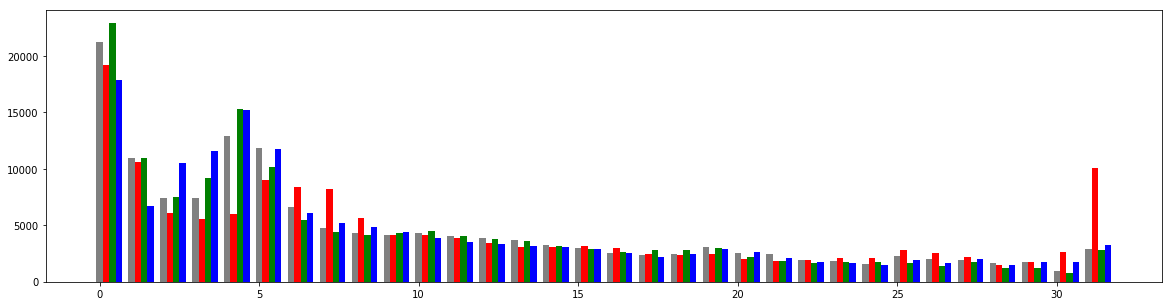

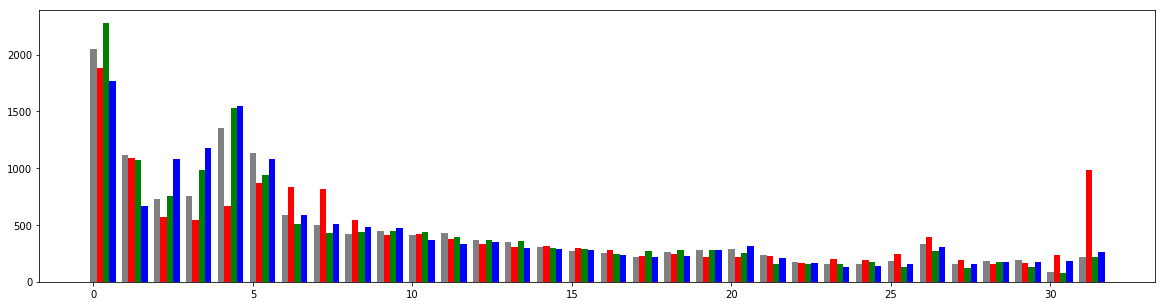

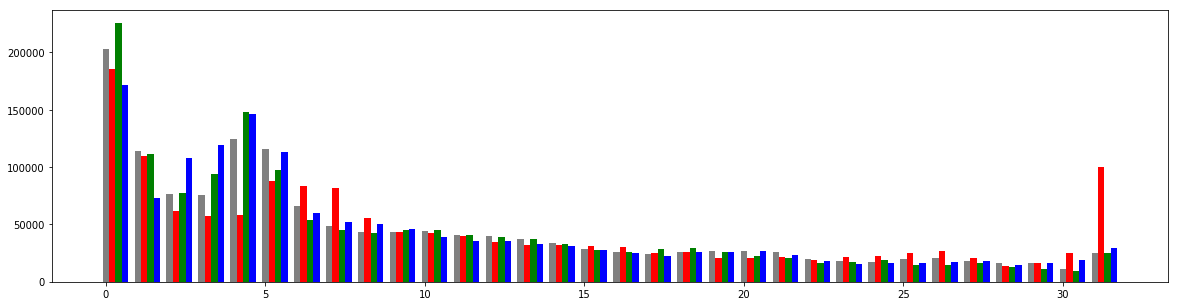

In [13]:
from skimage import transform
import math
face = io.imread("images/face.png")

scaling = math.sqrt(10)

face_reduced = transform.resize(face, (int(face.shape[0]/scaling), int(face.shape[1]/scaling)), mode='reflect')
face_augmented = transform.resize(face, (int(face.shape[0]*scaling), int(face.shape[1]*scaling)), mode='reflect')

# Display images
f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(20,5))

# Original
axarr[0].imshow(face)
axarr[0].set_title('Original image')

# Reduced
axarr[1].imshow(face_reduced)
axarr[1].set_title('Reduced image')

# Augmented
axarr[2].imshow(face_augmented)
axarr[2].set_title('Augmented image')

plt.show()

show_histogram(face, 32)
show_histogram(face_reduced, 32)
show_histogram(face_augmented, 32)

b) Apply a convolution (15x15 uniform mask) on the resized images and compare the results.

1. Convolve the original image.
2. Convolve the image reduced 10 times.
3. Convolve the image augmented 10 times.

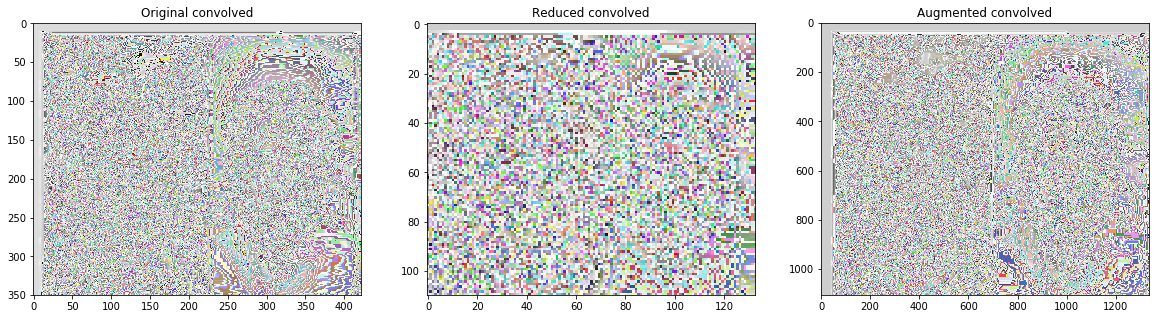

In [14]:
# Images
convolved_original = face.copy()
convolved_reduced = face_reduced.copy()
convolved_augmented = face_augmented.copy()
# Define convolution mask
mask_square = np.ones((15, 15))


# Convolve the images using our defined convolution mask
ndimage.convolve(face, [mask_square], output = convolved_original)
ndimage.convolve(face_reduced, [mask_square], output = convolved_reduced)
ndimage.convolve(face_augmented, [mask_square], output = convolved_augmented)


# Display images
f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(20,5))

# Original convolved
axarr[0].imshow((convolved_original * 255).astype(np.uint8))
axarr[0].set_title('Original convolved')

# Reduced convolved
axarr[1].imshow((convolved_reduced * 255).astype(np.uint8))
axarr[1].set_title('Reduced convolved')

# Augmented convolved
axarr[2].imshow((convolved_augmented * 255).astype(np.uint8))
axarr[2].set_title('Augmented convolved')

plt.show()

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

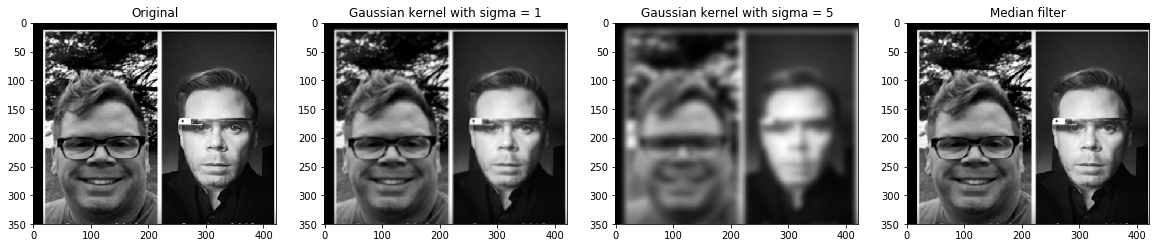

In [119]:
from skimage import filters, color

# Loading image and turning it to grayscale
face = io.imread("images/face.png")
face_gray = color.rgb2gray(face)

# Filters
face_gaussian_1 = filters.gaussian(face_gray, 1)
face_gaussian_5 = filters.gaussian(face_gray, 5)
filters.median(face_gray, out=face_median)


# Display images
f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(20,5))

# Original convolved
axarr[0].imshow(face_gray, cmap="gray")
axarr[0].set_title('Original')

# Gaussian kernel
# Sigma = 1
axarr[1].imshow(face_gaussian_1, cmap="gray")
axarr[1].set_title('Gaussian kernel with sigma = 1')

# Sigma = 5
axarr[2].imshow(face_gaussian_5, cmap="gray")
axarr[2].set_title('Gaussian kernel with sigma = 5')

# Median filter
axarr[3].imshow(face_median, cmap="gray")
axarr[3].set_title('Median filter')

plt.show()

b) **(Optional)** Apply the smoothing on some other images and present their results.

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

c) **(Optional)**

1. Apply fspecial('gaussian,hsize,sigma') with the formula hsize=4*sigma+1. What does hsize mean?
2. Compute hybrid images from other images. Apply it over color images.

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

In [ ]:
"""Solution, showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    #im.set_array(ic_small[:,:,:,i]) #showing the small image
    im.set_array(conv_color(ic_small[:,:,:,i], mask_2d))   
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


In [ ]:
"""Solution, showing 2 videos per annimation : original + blurred"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))

# 
# the framesD matrix is created by 0s
#
%matplotlib nbagg
mask_2d=np.ones((7,7)) # 7 by 7 mask with all ones
mask_2d/=mask_2d.sum() 

def updfig2(i):
    imm1.set_array(ic_small[:,:,:,i]) # we plot the original image just with the resize
    imm2.set_array(conv_color(ic_small[:,:,:,i], mask_2d)) # we plot the convolved image with the mask_2d
    plt.draw()
    return imm1,imm2,

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,3))
img0=ic_small[:,:,:,0]
imm1=ax1.imshow(img0)
imm2=ax2.imshow(img0)
plt.show()
ani = animation.FuncAnimation(fig, updfig2, interval=2, 
                              blit=True, repeat=False, frames=len(ic))
plt.show()